# <center> Ajuste lineal por mínimos cuadrados <center>

$(x_0,y_0),(x_1,y_1),...,(x_{n-1},y_{n-1})$
$$\hat y=\hat A+\hat Bx$$
$$y=A+Bx+\epsilon$$
$$S(x)=\sum_{i=0}^{n-1}x_i$$
$$S(y)=\sum_{i=0}^{n-1}y_i$$
$$SS(x)=\sum_{i=0}^{n-1}x_i^2$$
$$SXY(X,Y)=\sum_{i=0}^{n-1}x_iy_i$$
$$\Delta(x)=n\sum_{i=0}^{n-1}x_i^2-\left(\sum_{i=0}^{n-1}x_i\right)^2$$
Punto de corte:
\begin{equation}
A=\frac{SS(X)*S(Y)-S(X)*SXY(X,Y)}{\Delta(X)}
\end{equation}
Pendiente:
\begin{equation}
B=\frac{n*SXY(X,Y)-S(X)*S(Y)}{\Delta(X)}
\end{equation}
Incertidumbre en Y:(n-2: sesgo)
\begin{equation}
\sigma_y=\sqrt{\frac{\sum (y_{i}-(A+Bx_{i}))^2}{n-2}}
\end{equation}
Incertidumbre en A:
\begin{equation}
\Delta A=\sigma_{y}\frac{\sqrt{\sum x_i^2}}{\Delta(X)}
\end{equation}

In [2]:
import linear_fitting as ajuste #import misfunciones as acronimo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#para guardar figuras con latex
from matplotlib import rc
plt.rc('text', usetex=True)
import seaborn as sns
plt.style.use('seaborn-poster')
sns.set_context("poster")

In [4]:
#data1 corresponde a las mediciones de los ángulos de incidencia
#data2 corresponde a las mediciones de los ángulos de refraccion
data1=pd.read_csv("incident_angle_030347.txt",delimiter="\t",skiprows=1)
data2=pd.read_csv("refraction_trans_ang_030333.txt",delimiter="\t",skiprows=1)

In [5]:
print(data1)

             t           θ
0     0.000000  170.279427
1     0.100100  168.282275
2     0.200200  168.630136
3     0.300300  167.099544
4     0.400400  164.158466
..         ...         ...
167  16.717745   91.336843
168  16.817856   90.095768
169  16.917967   91.116299
170  17.018067   89.826581
171  17.118167   90.995053

[172 rows x 2 columns]


In [18]:
print(data1["θ"])
print(data2["θ"])

0      170.279427
1      168.282275
2      168.630136
3      167.099544
4      164.158466
          ...    
167     91.336843
168     90.095768
169     91.116299
170     89.826581
171     90.995053
Name: θ, Length: 172, dtype: float64
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
167   -83.600862
168   -84.216104
169   -85.025635
170   -85.847737
171   -87.205575
Name: θ, Length: 172, dtype: float64


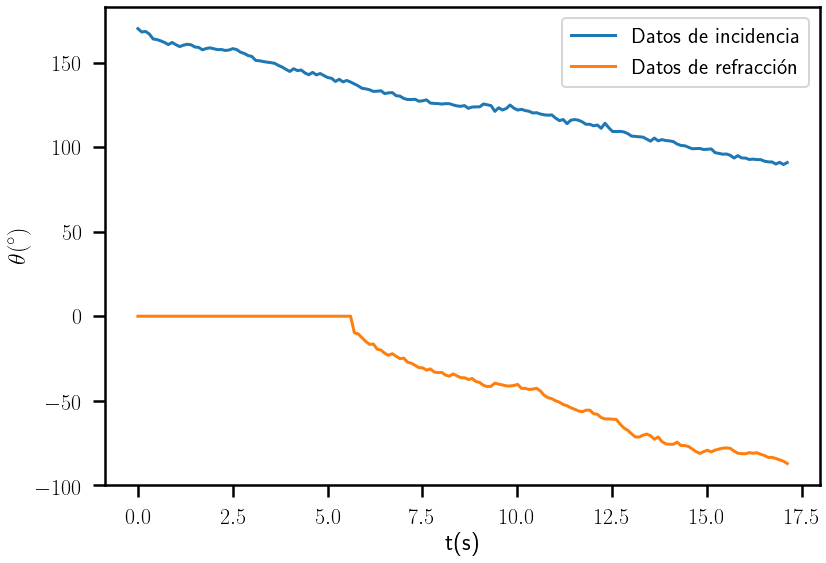

In [19]:
plt.plot(data1["t"],data1["θ"],label="Datos de incidencia")
plt.plot(data2["t"],data2["θ"],label="Datos de refracción")
plt.xlabel("t(s)")
plt.ylabel(r"$\displaystyle \theta(^\circ)$")
plt.legend()
plt.savefig("grafica_preliminar.png")

In [8]:
pos=0
while(np.abs(data2["θ"][pos])<1e-9):
    print(data2["θ"][pos])
    print(pos)
    pos+=1

0.0
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
20
0.0
21
0.0
22
0.0
23
0.0
24
0.0
25
0.0
26
0.0
27
0.0
28
0.0
29
0.0
30
0.0
31
0.0
32
0.0
33
0.0
34
0.0
35
0.0
36
0.0
37
0.0
38
0.0
39
0.0
40
0.0
41
0.0
42
0.0
43
0.0
44
0.0
45
0.0
46
0.0
47
0.0
48
0.0
49
0.0
50
0.0
51
0.0
52
0.0
53
0.0
54
0.0
55
0.0
56


In [9]:
#Solo tomaremos los angulos y no los tiempos
ang_inc=data1["θ"][57:]-90#-90*np.ones(len(data1["θ"][57:]))
ang_ref=data2["θ"][57:]+90#+90

In [10]:
print(ang_ref)

57     80.236963
58     79.556094
59     77.255568
60     75.107764
61     73.294421
         ...    
167     6.399138
168     5.783896
169     4.974365
170     4.152263
171     2.794425
Name: θ, Length: 115, dtype: float64


Modelo físico:
$$n_i\sin \theta_i=n_r\sin\theta_r$$
Transformamos coordenadas:
$$y=\sin\theta_2=\sin\theta_{tr}$$
$$x=\sin\theta_1=\sin\theta_{inc}$$
$$n_ix=n_ry$$
ni: Gelatina\
nr: aire\
$$y=\frac{n_i}{n_r}x$$
Ajuste:
$$\hat{y}=\hat{B}x+\hat{A}$$

Condiciones para poder linealizar una función.\
Ecuaciones con variables separables:
$$ln(y)=e^xy$$
$$\frac{ln(y)}{y}=e^x$$
$$v=\frac{ln(y)}{y}$$
$u=e^x$
$$U=X$$

In [11]:
X=np.sin(ang_inc*np.pi/180)
Y=np.sin(ang_ref*np.pi/180)

In [17]:
print(ajuste.A(X,Y)) #ajuste.nombre_funcion(args)
print(ajuste.B(X,Y))

0.021429047972105878
1.3398208993672323


In [13]:
ajuste.fit(X,Y)

'y=0.0214+1.3398208993672323x'

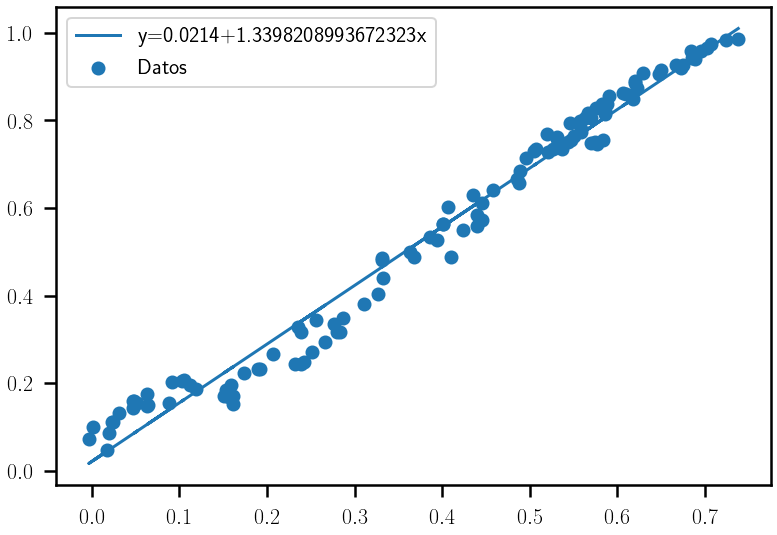

In [14]:
plt.scatter(X,Y,label="Datos")
plt.plot(X,ajuste.y_pred(X,X,Y),label=f"{ajuste.fit(X,Y)}")
# plt.xlabel("t(s)")
# plt.ylabel(r"$\displaystyle \theta(grados)$")
plt.legend()
plt.savefig("Ajuste")

# <center> Mínimos Cuadrados <center>
    Dados $(x_0,y_0),(x_1,y_1),...,(x_n,y_n)$, la optimización por mínimos cuadrados busca estimar los parámetros de $b_0$, $b_1$ que cumplen:
\begin{equation}
\hat{y}=\hat{b}_0\vec{x}+\hat{b}_1
\end{equation}
$$\hat{b}=(b_0,b_1)$$
La solucion para b es:
\begin{equation}
\hat{b}=(X^{T}X)^{-1}X^{T}Y
\end{equation}
\begin{equation}
X=\left(
\begin{matrix}
x_0 & 1\\
x_1 & 1\\
.. & ...\\
x_{n-1} &1
\end{matrix}\right)
\end{equation}
\begin{equation}
Y=\left(
\begin{matrix}
y_0\\
y_1\\
..\\
y_{n-1}
\end{matrix}\right)
\end{equation}
$$X^TX=\left(
\begin{matrix}
\sum x_i & n\\
\sum x_i^2 & \sum x_i\\
\end{matrix}\right)$$
Donde  $X=[[x0,1],[x1,1],...,[xn,1]]$ es una matriz de tamaño $n\times 2$, $\hat{b}=[[b_0],[b_1]]$ un array de tamaño $2\times 1$

In [15]:
Xaumentada=np.ones((len(X),2))
Xaumentada[:,0]=X
X_t_X=np.dot(Xaumentada.T,Xaumentada)

In [16]:
beta=np.dot(np.linalg.inv(X_t_X),np.dot(Xaumentada.T,Y))
print(beta)

[1.3398209  0.02142905]
